# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = ""
weather_data = []

for city in cities:
    
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        if (weather_json["cod"] == 429):
            print("pending")
            time.sleep(60)  
            print("done")
        else:
            cloudiness = weather_json["weather"][0]["description"]
            
            temperature = weather_json["main"]["temp"]
            
            humidity = weather_json["main"]["humidity"]
            
            longitude = weather_json["coord"]["lon"]
            
            latitude = weather_json["coord"]["lat"]
            
            wind_speed = weather_json["wind"]["speed"]

            weather_data.append({"City": city,
                        "Cloudiness": cloudiness,
                        "Humidity": humidity,
                        "Lat": latitude,
                        "Lng": longitude,
                        "Temp": temperature,
                        "Wind Speed": wind_speed})
        
    except:
        print(f"no data for {city}")
        
    

print(weather_data)

no data for taolanaro
no data for belushya guba
no data for kazalinsk
no data for palabuhanratu
no data for vaitupu
no data for barentsburg
no data for warqla
no data for louisbourg
no data for nizhneyansk
no data for khormuj
no data for mys shmidta
no data for tsihombe
no data for kamenskoye
no data for tumannyy
no data for illoqqortoormiut
no data for marcona
no data for attawapiskat
no data for tuggurt
no data for tubruq
no data for amderma
no data for mergui
no data for longlac
no data for nguiu
no data for umm durman
no data for basyanovskiy
no data for umzimvubu
no data for lolua
no data for sentyabrskiy
no data for naftah
no data for temaraia
no data for mocambique
no data for tasbuget
no data for othonoi
no data for ksenyevka
no data for utiroa
no data for uniao da victoria
no data for aflu
no data for jinchengjiang
no data for grand river south east
no data for satitoa
no data for ngukurr
no data for grand centre
no data for kesennuma
no data for samalaeulu
no data for alotau


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
weather_df = pd.DataFrame(weather_data)
print(weather_df.head())

           City       Cloudiness  Humidity    Lat    Lng   Temp  Wind Speed
0  punta arenas    broken clouds        83 -53.15 -70.92  33.40        6.93
1       hualmay       few clouds        70 -11.10 -77.61  66.97       10.56
2         baran    broken clouds        72  25.10  76.52  83.19        8.52
3        albany        clear sky        37  42.60 -73.97  87.96        8.99
4      meulaboh  overcast clouds        83   4.14  96.13  77.05        2.71


In [48]:
weather_df.to_csv("weather_data_results.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

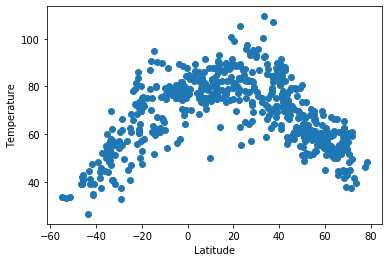

<Figure size 432x288 with 0 Axes>

In [74]:


x_values = weather_df['Lat']
y_values = weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig('plot_1.png', dpi=300, bbox_inches='tight')

#### Latitude vs. Humidity Plot

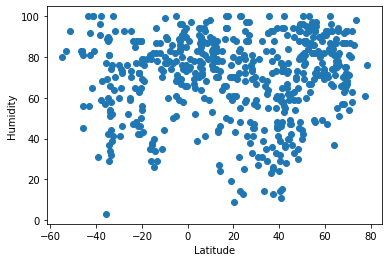

<Figure size 432x288 with 0 Axes>

In [75]:

x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('plot_2.png', dpi=300, bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

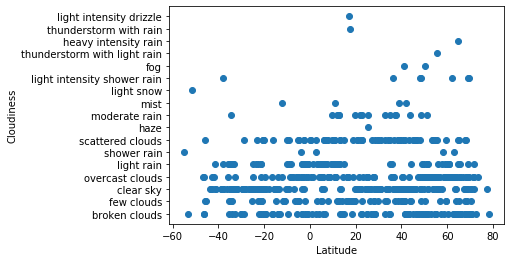

<Figure size 432x288 with 0 Axes>

In [76]:

x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('plot_3.png', dpi=300, bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

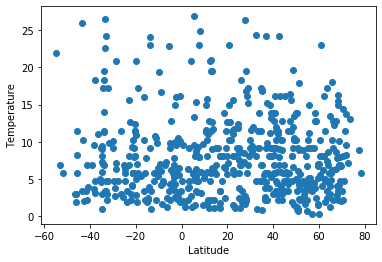

<Figure size 432x288 with 0 Axes>

In [77]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig('plot_4.png', dpi=300, bbox_inches='tight')

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [34]:
# Create Northern and Southern Hemisphere DataFrames
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = ""
weather_data_a = []
weather_data_b = []

for city in cities:
    
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        if (weather_json["cod"] == "429"):
            time.sleep(60000)           
        else:
            
            cloudiness = weather_json["weather"][0]["description"]
            
            temperature = weather_json["main"]["temp"]
            
            humidity = weather_json["main"]["humidity"]
            
            longitude = weather_json["coord"]["lon"]
            
            latitude = weather_json["coord"]["lat"]
            
            wind_speed = weather_json["wind"]["speed"]
           

            if (latitude < 0):
                weather_data_a.append({"City": city,
                        "Cloudiness": cloudiness,
                        "Humidity": humidity,
                        "Lat": latitude,
                        "Lng": longitude,
                        "Temp": temperature,
                        "Wind Speed": wind_speed})
            else:
                weather_data_b.append({"City": city,
                        "Cloudiness": cloudiness,
                        "Humidity": humidity,
                        "Lat": latitude,
                        "Lng": longitude,
                        "Temp": temperature,
                        "Wind Speed": wind_speed})
        
    except:
        print(f"no data for {city}")
        
    


no data for higuey
no data for nizhneyansk
no data for taolanaro
no data for belushya guba
no data for bajo baudo
no data for mendahara
no data for barentsburg
no data for illoqqortoormiut
no data for crab hill
no data for vaitupu
no data for tsihombe
no data for sindand
no data for grand river south east
no data for mys shmidta
no data for rungata
no data for attawapiskat
no data for sentyabrskiy
no data for toliary
no data for palabuhanratu
no data for candawaga
no data for samusu
no data for duz
no data for one hundred mile house
no data for buqayq
no data for amderma
no data for urdzhar
no data for saleaula
no data for kosgi
no data for tabiauea
no data for kuche
no data for gangotri
no data for bolungarvik
no data for temaraia
no data for bolshiye saly
no data for yanan
no data for kazalinsk
no data for tidore
no data for dibaya
no data for ciras
no data for yeehaw junction
no data for agva
no data for bacuit
no data for tawnat
no data for meyungs
no data for lolua
no data for tum

In [35]:
weather_df_a = pd.DataFrame(weather_data_a)
weather_df_b = pd.DataFrame(weather_data_b)
print(weather_df_a.head())
print(weather_df_b.head())

             City        Cloudiness  Humidity    Lat     Lng   Temp  \
0  port elizabeth         clear sky        58 -33.92   25.57  57.20   
1    punta arenas        light rain        89 -53.15  -70.92  33.39   
2         mataura   overcast clouds        83 -46.19  168.86  39.00   
3       cape town     broken clouds        54 -33.93   18.42  53.55   
4         rikitea  scattered clouds        85 -23.12 -134.97  72.84   

   Wind Speed  
0       16.11  
1        9.17  
2        3.00  
3        5.82  
4       14.72  
             City        Cloudiness  Humidity    Lat     Lng   Temp  \
0           lagoa         clear sky        80  39.05  -27.98  68.99   
1          hirara   overcast clouds        80  24.80  125.28  84.78   
2            faya   overcast clouds        49  18.39   42.45  74.30   
3          albany        light rain        36  42.60  -73.97  87.40   
4  ribeira grande  scattered clouds        78  38.52  -28.70  71.60   

   Wind Speed  
0       13.38  
1       11.86  
2 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [82]:

x_values_a=  weather_df_a["Lat"]
y_values_a= weather_df_a["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_a, y_values_a)

# Get regression values
regress_values = x_values_a * slope + intercept
print(regress_values)

0      52.101786
1      34.275270
2      40.727301
3      52.092516
4      62.113557
         ...    
161    52.064705
162    76.018795
163    75.527477
164    77.168295
165    63.457730
Name: Lat, Length: 166, dtype: float64


In [83]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.93x +83.55


The r-squared is: 0.8379511294111575


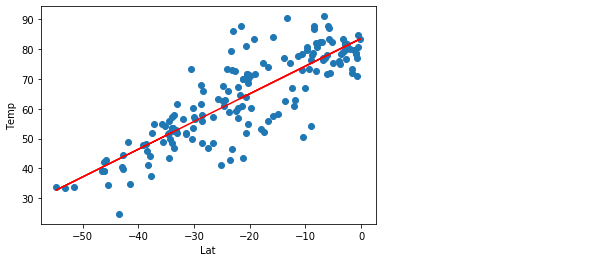

<Figure size 432x288 with 0 Axes>

In [85]:
plt.scatter(x_values_a,y_values_a)
plt.plot(x_values_a,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
plt.savefig('plot_5.png', dpi=300, bbox_inches='tight')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [86]:
x_values_b=  weather_df_b["Lat"]
y_values_b= weather_df_b["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_b, y_values_b)

# Get regression values
regress_values = x_values_b * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)



y = -0.52x +90.7


The r-squared is: -0.7236437587136746


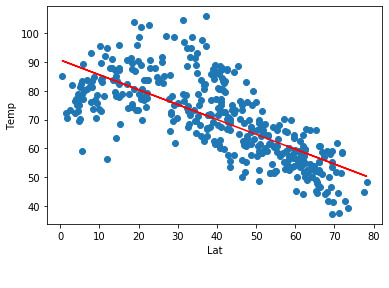

<Figure size 432x288 with 0 Axes>

In [87]:
plt.scatter(x_values_b,y_values_b)
plt.plot(x_values_b,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
plt.savefig('plot_5.png', dpi=300, bbox_inches='tight')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [89]:
x_values_c=  weather_df_a["Lat"]
y_values_c= weather_df_a["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_c, y_values_c)

# Get regression values
regress_values = x_values_c * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


y = 0.01x +69.15


The r-squared is: 0.005674632926638239


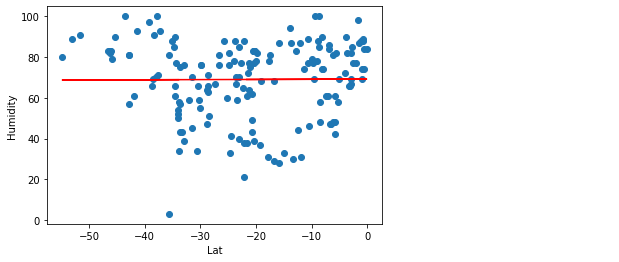

<Figure size 432x288 with 0 Axes>

In [90]:
plt.scatter(x_values_c,y_values_c)
plt.plot(x_values_c,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
plt.savefig('plot_6.png', dpi=300, bbox_inches='tight')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [91]:
x_values_d=  weather_df_b["Lat"]
y_values_d= weather_df_b["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_d, y_values_d)

# Get regression values
regress_values = x_values_d * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


y = 0.1x +64.84


The r-squared is: 0.08589723175479001


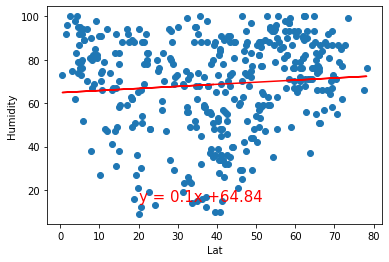

<Figure size 432x288 with 0 Axes>

In [93]:
plt.scatter(x_values_d,y_values_d)
plt.plot(x_values_d,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
plt.savefig('plot_5.png', dpi=300, bbox_inches='tight')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [67]:
x_values_e=  weather_df_a["Lat"]
y_values_e= weather_df_a["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_e, y_values_e)

# # Get regression values
# regress_values = x_values_e * slope + intercept

# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


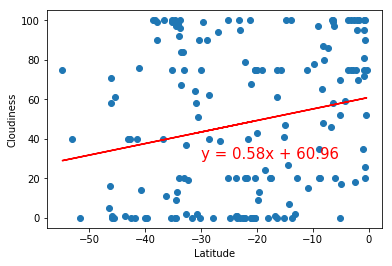

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [94]:
x_values_f=  weather_df_a["Lat"]
y_values_f= weather_df_a["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_f, y_values_f)

# Get regression values
regress_values = x_values_f * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


y = -0.06x +6.86


The r-squared is: -0.13812247715099576


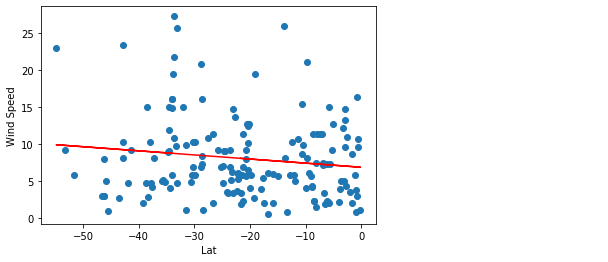

<Figure size 432x288 with 0 Axes>

In [95]:
plt.scatter(x_values_f,y_values_f)
plt.plot(x_values_f,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
plt.savefig('plot_6.png', dpi=300, bbox_inches='tight')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [96]:
x_values_g=  weather_df_b["Lat"]
y_values_g= weather_df_b["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_g, y_values_g)

# Get regression values
regress_values = x_values_g * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.0x +7.54


The r-squared is: 0.0021214454851760343


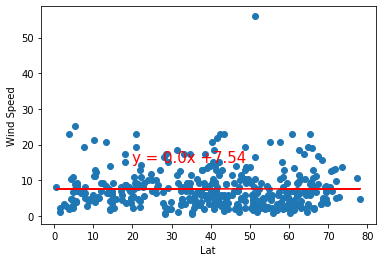

<Figure size 432x288 with 0 Axes>

In [97]:
plt.scatter(x_values_g,y_values_g)
plt.plot(x_values_g,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
plt.savefig('plot_7.png', dpi=300, bbox_inches='tight')